<a href="https://colab.research.google.com/github/omkarsp644/Heart-Attack-And-Diabetes-prediction-using-python/blob/master/RNN_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Stock_Price_Prediction

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Stock_Price_Prediction


In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [3]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [4]:
dataset = pd.read_csv('IBM_data.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [5]:


training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

print(training_set[0])

print(test_set[0])



[82.55]
[167.87]


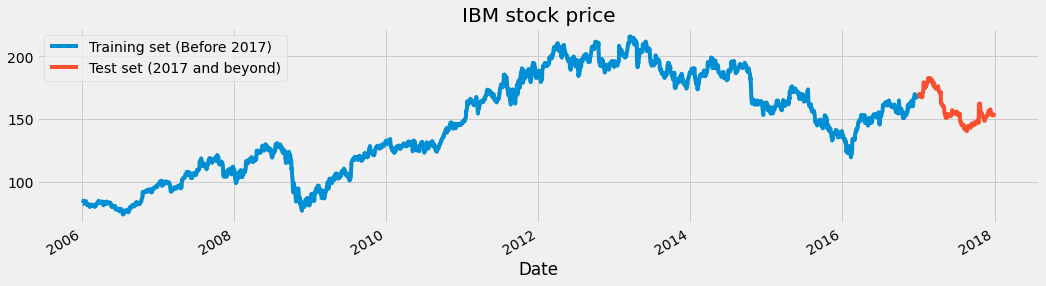

In [7]:
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()


In [8]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [10]:
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
85/85 [==============================] - 17s 63ms/step - loss: 0.0207
Epoch 2/50
85/85 [==============================] - 5s 63ms/step - loss: 0.0103
Epoch 3/50
85/85 [==============================] - 5s 63ms/step - loss: 0.0083
Epoch 4/50
85/85 [==============================] - 5s 63ms/step - loss: 0.0071
Epoch 5/50
85/85 [==============================] - 5s 63ms/step - loss: 0.0061
Epoch 6/50
85/85 [==============================] - 6s 66ms/step - loss: 0.0054
Epoch 7/50
85/85 [==============================] - 6s 68ms/step - loss: 0.0047
Epoch 8/50
85/85 [==============================] - 6s 67ms/step - loss: 0.0046
Epoch 9/50
85/85 [==============================] - 6s 67ms/step - loss: 0.0040
Epoch 10/50
85/85 [==============================] - 6s 66ms/step - loss: 0.0037
Epoch 11/50
85/85 [==============================] - 6s 69ms/step - loss: 0.0036
Epoch 12/50
85/85 [==============================] - 6s 66ms/step - loss: 0.0034
Epoch 13/50
85/85 [=================

In [11]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [12]:
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

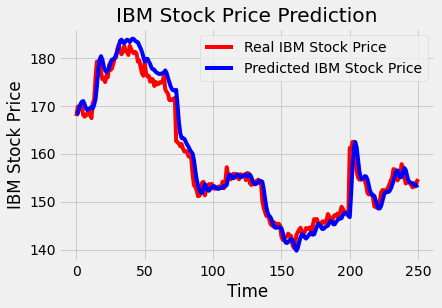

In [13]:
plot_predictions(test_set,predicted_stock_price)

In [14]:
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 2.370078037138702.


In [21]:
X_train[0], y_train[0]

(array([[0.06065089],
        [0.06029868],
        [0.06311637],
        [0.0781206 ],
        [0.07262609],
        [0.07171034],
        [0.07657087],
        [0.07058326],
        [0.0669907 ],
        [0.06494787],
        [0.075796  ],
        [0.07361229],
        [0.06417301],
        [0.05621302],
        [0.05783319],
        [0.05409975],
        [0.05431107],
        [0.05515638],
        [0.05543815],
        [0.05677656],
        [0.05846717],
        [0.05388842],
        [0.04811214],
        [0.04233587],
        [0.04402649],
        [0.0490279 ],
        [0.04832347],
        [0.05297267],
        [0.05614258],
        [0.05290223],
        [0.05325444],
        [0.04909834],
        [0.04994365],
        [0.04797126],
        [0.05431107],
        [0.05212736],
        [0.04726684],
        [0.04895745],
        [0.04656241],
        [0.04839391],
        [0.04416737],
        [0.0485348 ],
        [0.04719639],
        [0.04825303],
        [0.05395886],
        [0